In [1]:
import pandas as pd

data = pd.read_csv("Train_churn.csv")

In [2]:
data = data.set_index(['ID'])
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [3]:
data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
ID,,,,,,,,,,
84e2fcc9,36,0,5L - 10L,563266.44,4,0,1,0,Average,1
57fea15e,53,0,Less than 5L,875572.11,2,1,1,1,Poor,0
8df34ef3,35,0,More than 15L,701607.06,2,1,2,0,Poor,0
c5c0788b,43,0,More than 15L,1393922.16,0,1,2,1,Poor,1
951d69c4,39,0,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...
a8216afd,61,1,5L - 10L,1354526.19,4,1,2,1,Poor,1
153a306b,42,0,5L - 10L,596286.54,3,1,2,1,Average,0
d4075a95,29,1,Less than 5L,979298.19,2,0,2,0,Poor,0


In [4]:
a = []
for cc in data.Credit_Category:
    if(cc[0]=='P'):
        a.append(-1)
    elif(cc[0]=='A'):
        a.append(0)
    else:
        a.append(1)

In [5]:
data.Credit_Category = a

In [6]:
a = []
for cc in data.Income:
    if(cc[0]=='L'):
        a.append(-1)
    elif(cc[0]=='5'):
        a.append(0)
    else:
        a.append(1)

In [7]:
data.Income = a

In [8]:
a = [] 
for i in data.Product_Holdings:
    if(i[0]=='3'):
        a.append(3)
    else:
        a.append(int(i))
data.Product_Holdings=a

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Is_Churn'],axis=1), data.Is_Churn , test_size=0.1, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [31]:
X_train

array([[ 2.47004993, -1.0882585 , -1.53097184, ..., -0.98088579,
         0.70817037,  1.54378734],
       [ 2.15955141,  0.91889932, -1.53097184, ..., -0.98088579,
         0.70817037, -0.95778765],
       [ 1.02105681, -1.0882585 ,  0.926549  , ..., -0.98088579,
         0.70817037,  1.54378734],
       ...,
       [ 0.08956123,  0.91889932, -0.30221142, ..., -0.98088579,
         0.70817037, -0.95778765],
       [ 2.15955141, -1.0882585 ,  0.926549  , ...,  0.77153256,
         0.70817037, -0.95778765],
       [ 1.02105681,  0.91889932, -0.30221142, ...,  2.52395091,
         0.70817037,  1.54378734]])

In [32]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [34]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.759398,0.036810,0.666667
Support Vector Machines,0.756391,0.006135,1.000000
Decision Trees,0.667669,0.386503,0.342391
Random Forest,0.729323,0.122699,0.350877
Naive Bayes,0.751880,0.061350,0.454545
K-Nearest Neighbor,0.721805,0.122699,0.322581


In [53]:
def customLoss(y_true, y_pred):
  y_pred-=float(y_true)
  y_pred*=1000
  y_pred = abs(y_pred)
  return y_pred

In [65]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=X_train[0].size))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='tanh')) 
model.compile(loss=customLoss, optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1280      
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,945
Trainable params: 50,945
Non-trainable params: 0
_________________________________________________________________


In [66]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 276.5259 - accuracy: 0.7704 - val_loss: 254.8828 - val_accuracy: 0.7549
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 243.8929 - accuracy: 0.7704 - val_loss: 252.4897 - val_accuracy: 0.7549
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 241.0960 - accuracy: 0.7704 - val_loss: 247.9443 - val_accuracy: 0.7549
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 247.3844 - accuracy: 0.7704 - val_loss: 290.3970 - val_accuracy: 0.7549
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 241.7429 - accuracy: 0.7704 - val_loss: 265.2642 - val_accuracy: 0.7549
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 245.9810 - accuracy: 0.7704 - val_loss: 256.2922 - val_accuracy: 0.7549
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 237.8267 - accuracy: 0.7704 - val_loss: 256.6945 - val_accuracy:

[]

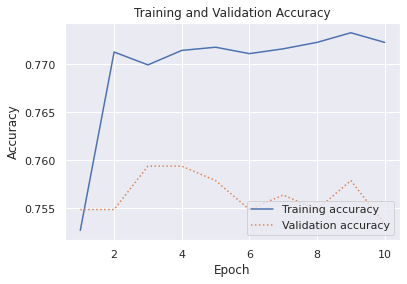

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(88.27375, 0.5, 'Actual label')

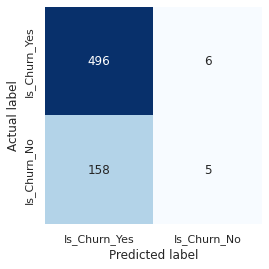

In [38]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Is_Churn_Yes', 'Is_Churn_No']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [39]:
import numpy as np
np.sum(data.Is_Churn)

1537

In [40]:
len(data)

6650